<div> 
<DIV align="Center">
<FONT FACE="times new roman" SIZE=5>
<i><b>REGRESION LINEAL SIMPLE Y REGRESION LINEAL MULTIPLE</b></i> 
<br><b>Universidad Sergio Arboledad</b>
</DIV>

<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
</DIV>
<i><b>Ingenieros en Formación:</b></i>  
Juan Esteban Arias Patron, Juan Camilo Hernández Ibáñez
<br>
<i><b>Correo:</b></i> <br>
Juan.arias07@correo.usa.edu.co
Juan.hernandez07@correo.usa.edu.co
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Machine Learning Computación Avanzada
<br>
<i><b>Fecha de Entrega: </b></i>15/03/21
<br>
</FONT>
</div>

**Resumen:** Se propone hacer una regresion lineal siemple y regresion lineal multiple en base a un dataset el cual contiene informacion del GDP per capita, generosisdad, felicidad, salud, libertad (entre otros) de 155 paises del mundo. Del mismo modo, a traves de las regresiones lineales y multiples se busca encontrar la relacion entre la felicidad de las personas de tales paises con la economia y la generosidad de los mismos.


---
# **REGRESION LINEAL SIMPLE**
---

**¿QUE ES?**

Una regresión es un anáisis estadístico realizado sobre un conjunto de datos con el fin de obtener una relación funcional entre las variable involucradas. Además, este análisis permite realizar predicciones de valores que no se midieron, ya sea dentro del rango de los datosconocidos (interpolación) o fuera de éste (extrapolación).


**Paso 1:** Se importan las bibliotecas correspondientes para el desarrollo de las regresiones

1.   **matplotlib.pyplot:**  Es un modulo el cual tiene como funcionalidad  generar gráficas a partir de datos contenidos en el dataset (tambien se puede aplicar para listas, vectores, etc).
2.   **numpy:**Permite declarar arrays con distintas dimensiones capaces de albergar gran cantidad de datos del mismo tipo y relacionados entre sí. Además, provee numerosos métodos para manipular los arrays; y para acceder a la información y procesarla de forma muy eficiente.
3.   **pandas:** Permite leer y escribir fácilmente ficheros en formato CSV, a su vez permite acceder a los datos mediante índices o nombres para filas y columnas y por ultimo ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
4.   **math:**Su principal funcion es facilitar el uso  de calculos matematicos como lo es la radicacion, potenciacion, etc, a través de las funciones internas del modulo.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
from mpl_toolkits.mplot3d import Axes3D

**Paso 2:** Se lee el dataset

In [ ]:
url = '/content/drive/MyDrive/Dataset_Parcial.csv'
dataframe0 = pd.read_csv(url)

A continuación se presentan las 5 primeras filas del dataset haciendo uso de la función ***.head()*** 

In [ ]:
dataframe0.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


**Paso 3:** Una vez que ya se tienen los datos cargados en el dataframe ee cambian los nombres de las columnas "Happiness.Score" y 
"Economy..GDP.per.Capita." con el fin de facilitar el manejo y uso de los datos y hacer legible el dataset.

In [ ]:
dataframe0.rename(columns={"Happiness.Score": "Happiness Score"},inplace=True)
dataframe0.rename(columns={"Economy..GDP.per.Capita.": "Economy GDP per Capita"},inplace=True)

**Paso 4:** Se pivotea la columna 'Country'.




In [ ]:
dataframe0.set_index('Country',inplace=True)
dataframe = dataframe0 [['Economy GDP per Capita','Happiness Score']]
dataframe.head()

,Economy GDP per Capita,Happiness Score
Country,,
Norway,1.616463,7.537
Denmark,1.482383,7.522
Iceland,1.480633,7.504
Switzerland,1.564980,7.494
Finland,1.443572,7.469


**Paso 5:** Se quiere que el gdp percapita este redondeado con tres decimales

In [ ]:
decimales = 3
dataframe["Economy GDP per Capita"] = dataframe["Economy GDP per Capita"].apply(lambda x: round(x,decimales))
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Economy GDP per Capita,Happiness Score
Country,,
Norway,1.616,7.537
Denmark,1.482,7.522
Iceland,1.481,7.504
Switzerland,1.565,7.494
Finland,1.444,7.469


**Paso 6:** Se grafica la relación entre el puntaje de felicidad y la economia GDP per capita en donde cada uno de los puntos corresponde a un pais.

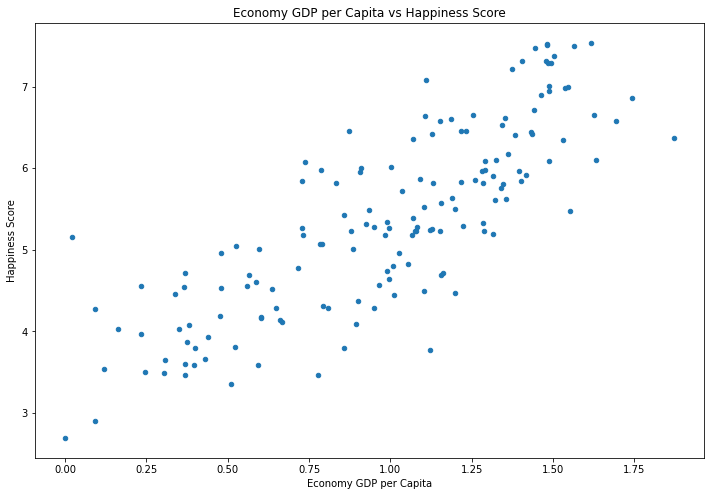

In [ ]:
dataframe.plot(kind = 'scatter', x= 'Economy GDP per Capita', y = 'Happiness Score',
              title = 'Economy GDP per Capita vs Happiness Score',figsize=(12,8))

**Paso 7:** Una vez que ya se tienen organizados los datos del dataframe en variables dependientes e indepenientes se procede a realizar la Regresion Lineal Simple utilizando el metodo de minimos cuadrados. Para llevarla a cabo se realizó el siguiete procedimiento matematico:
<DIV align="Center" >
<FONT FACE="times new roman" SIZE=5>
<br><b>COMO HACR UNA REGRESIÓN LINEAL SIMPLE</b>
</FONT >
</DIV>

<div> 

---

<div> 
<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/c_scale,w_403/v1615832323/Formula_Recta_ketwyt.png" align="right">
<br><br/>
</div>

<DIV align="Center">
<i><b>donde βˆ0 es el intercepto y βˆ1 es la pendiente de la recta obtenida de la regresión por mínimos cuadrados. Como se demostrará a continuación, el intercepto y la pendiente resultan ser: </b></i> 

<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/c_scale,w_500/v1615834928/Formula_Recta_puaqqn.png" align="rigth" >

---

</DIV>


donde **x** e **y** son precisamente los promedios de las medidas experimentales.
Al igual que toda medida, los coeficientes βˆ0 y βˆ1 poseen error, los cuales están dados por las ecuaciones:

<DIV aling = "center"> 
<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/v1615836566/Formula_Recta_jlgmhu.png" align="center" >

</DIV>
<br><br/>


---






Se hace uso de la funcion ***mean().*** con el fin de obtener el promedio de los datos del eje **x** (Economy GDP per Capita) y el eje **y** (Happiness Score)

In [ ]:
#Promedio del eje x (Economy GDP per Capita)
x = (dataframe.loc[dataframe.index]["Economy GDP per Capita"]).mean()
print(x)
#Promedio del eje y (Happiness Score)
y = (dataframe.loc[dataframe.index]["Happiness Score"]).mean()
print(y)
  

0.9847161290322585
5.354019355773926


Ahora, se eleva al cuadrado cada dato del eje **x** y el eje **y** con el fin de determinar nuevamene el promedio.

In [ ]:
#Sumas del eje x al cuadrado (Economy GDP per Capita)
xCuadrado = (dataframe.loc[dataframe.index]["Economy GDP per Capita"]**2).mean()
print(xCuadrado)
#Sumas del eje y al cuadrado (Happiness Score)
yCuadrado = (dataframe.loc[dataframe.index]["Happiness Score"] **2).mean()
print(yCuadrado)

1.1456039290322584
29.936948768548152


Por ultimo se realiza el producto entre el eje **x** y el eje **y** y se determina el promedio de los datos

In [ ]:
#Sumas del eje x por y (Economy GDP per Capita)
productoxy = ((dataframe.loc[dataframe.index]["Economy GDP per Capita"])*(dataframe.loc[dataframe.index]["Happiness Score"])).mean()
print(productoxy)

5.6564559161524635


Al tener los respectivos promedios de las variables dependientes e independientes, y con base a la regresion lineal se determina la ecuacion de la recta, con el fin de determinar la tendencia de los datos

**PUNTO DE CORTE**

In [ ]:
puntoCorte = ((xCuadrado * y) - (productoxy * x))/(xCuadrado - (x*x))      
print(puntoCorte)

3.203298880457846


**PENDIENTE**

In [ ]:
pendiente = ((productoxy)-(x*y))/(xCuadrado-(x*x))
print(pendiente)

2.1841020085958425


Una vez se tienen los datos se procede a graficar la recta
---


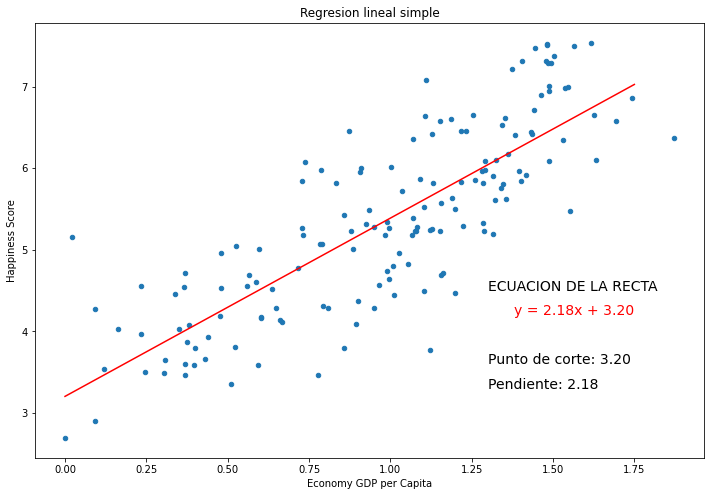

In [ ]:
dataframe.plot(kind='scatter',x='Economy GDP per Capita',y='Happiness Score',
               title ='Regresion lineal simple', figsize=(12,8))
X = np.linspace(0,1.75)

#Para trasar la linea recta se necesita la pendiente(m) y el punto de inteseccion (b)
# y = mX + b 
plt.plot(X,pendiente*X+puntoCorte,'r')

plt.text(1.3,4.5,"ECUACION DE LA RECTA",fontsize = 14, color='black')
plt.text(1.38,4.2,"y = 2.18x + 3.20",fontsize = 14, color='r')
plt.text(1.3,3.6,"Punto de corte: 3.20",fontsize = 14, color='black')
plt.text(1.3,3.3,"Pendiente: 2.18",fontsize = 14, color='black')

plt.show()



---


**Paso 8:**  Al igual que toda medida, los coeficientes βˆ0 y βˆ1 poseen error, de modo que se determina el error relacionado a la pendiente y el punto de corte de la recta con las siguientes ecuaciones:
</DIV>
<DIV aling = "center"> 
<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/v1615836566/Formula_Recta_jlgmhu.png" align="center" >

</DIV>
<br><br/>

---

**SE PROCEDE A REALIZAR EL CALCULO**

Media de Error en la pendiente (m)

In [ ]:
numerador = (((xCuadrado-(x*x))*(yCuadrado-(y*y)))-((productoxy-(x*y))**2))
denominador = ((productoxy-(x*y))**2)
errorPendiente = pendiente * math.sqrt((1/(155-2)) * (numerador/denominador))
print(errorPendiente)

0.1267040616609825


Media de Error en el punto de corte (b)

In [ ]:
errorCorte = errorPendiente * (math.sqrt(xCuadrado))
print(errorCorte)

0.13561501745493756


**Paso 9:**  Determinar que tan bien predice el comportamiento de los datos la recta encontrada a través de la regresión lineal

**COEFICIENTE DE CORRELACION DE PEARSON**


---


R se conoce como el coeficiente de determinación. Este coeficiente es una medida de la “fuerza” o asertividad que posee el modelo planteado para predecir los resultados. En el caso particular de una línea recta, R2 coincide
con el cuadrado del coeficiente de correlación de Pearson, el cual es una medida de la relación lineal de dos variables y se representa con la letra R.

<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/v1615837491/Formula_Recta_i42kyc.png" align="center" >



1.   Si R = 1, se considera que la correlación lineal es perfecta. Además, al ser positiva, la recta de predicción será creciente.
2.   Si R = −1, se dice que la correlación lineal es perfecta. Además, al ser negativa, la recta de predicción será decreciente.
3.   Si 0 < R < 1, la correlación lineal es positiva y la recta de predicción será creciente.
4.    Si 0 > R > −1, la correlación lineal es negativa y la recta de predicción  será decreciente.  






---

**SE PROCEDE A REALIZAR EL CALCULO**

In [ ]:
#coeficiente de correlacion de Pearson

sumatoria = (((dataframe.loc[dataframe.index]["Economy GDP per Capita"])-x)*((dataframe.loc[dataframe.index]["Happiness Score"]) - y)).sum()
R = (sumatoria / (155 * (math.sqrt((xCuadrado)-(x**2))) * (math.sqrt((yCuadrado)-y**2)))) 
print(R)

0.8124700777322414


**CONCLUSIÓN**

Se concluye que la recta encontrada por el metodo de minimos cuadrados predice casi en su totalidad el comportamiento de los datos ya que el coeficiente de correlación cuenta con aproximadamente 0.2 de desviación a la hora de predecir la tendencia de los datos. 

A su vez, hay que tener en cuenta que la diferencia media de error encontrada en el resultado de la pendiente y punto de corte de la recta, varia de entre 0.13 y 0.12, haciendo que el error en la medida de la relacion de las variables sea minimo.

Finalmente, la recta resultante del proceso matematico realizado a través del metodo de minimos cuadrados predice de manera muy cercana la tendencia y comportamiento de los datos, teniendo en cuenta las medias de error dichas anteriormente.

---
# **REGRESION LINEAL MULTIPLE**
---

**¿QUE ES?**

La regresión lineal múltiple trata de ajustar modelos lineales o linealizables entre una variable dependiente y más de una variables independientes. En este tipo de modelos es importante testar la heterocedasticidad, la multicolinealidad y la especificación

**Paso 1:** Se determinan las variables dependientes y variables independientes

---

**VARIABLES DEPENDIENTES**

*  Economy GDP per Capita

**VARIABLES INDEPENDIENTES**

*   Happiness Score
*   Generosity


Cabe mencionar, que en la Regresión Lineal Multiple, se pueden tomar cualquier numero de variables independientes siempre y cuando exista una relacion entre estas variables. Para este caso se tomaran unicamente dos variables independentes para que despues puedan ser graficados el comportamiento de los datos en un plano 3d.  



In [ ]:
dataframe2 = dataframe0 [['Economy GDP per Capita','Happiness Score', 'Generosity']]
dataframe2.head()

,Economy GDP per Capita,Happiness Score,Generosity
Country,,,
Norway,1.616463,7.537,0.362012
Denmark,1.482383,7.522,0.355280
Iceland,1.480633,7.504,0.475540
Switzerland,1.564980,7.494,0.290549
Finland,1.443572,7.469,0.245483


**Paso 2:** Se quiere que las columnas "Economy GDP per Capita" y "Generosity" esten redondeadas con tres decimales

In [ ]:
decimales = 3
dataframe2[["Economy GDP per Capita", "Generosity"]] = dataframe0[["Economy GDP per Capita", "Generosity"]].apply(lambda x: round(x,decimales))
dataframe2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Economy GDP per Capita,Happiness Score,Generosity
Country,,,
Norway,1.616,7.537,0.362
Denmark,1.482,7.522,0.355
Iceland,1.481,7.504,0.476
Switzerland,1.565,7.494,0.291
Finland,1.444,7.469,0.245


**Paso 3:** Una vez que ya se tienen organizados los datos del dataframe en variables dependientes e indepenientes se procede a realizar la **Regresion Lineal Multivariable**. Para llevarla a cabo se realizó el siguiete procedimiento matematico:
<DIV align="Center" >
<FONT FACE="times new roman" SIZE=5>
<br><b>COMO HACR UNA REGRESIÓN LINEAL MULTIPLE</b>
</FONT >
</DIV>


---

Para poder resolver y obtener  y  en una ecuación de regresión múltiple el cálculo se presentan 3 ecuaciones que se generan por el método de mínimo de cuadrados

<div> 
<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/v1615853823/Ecuacion_Multiple_mfj2im.png" align="center">
</div>

<DIV align="left">
<i><b> Donde  a, b y c se despejan realizando un sistema de ecuaciones </b></i> 
</DIV>


---

**SOLUCIONANDO PROCESO MATEMATICO**


Sumatorias de los ejes **x** **y** **z**



In [ ]:
#Sumas del eje y (Happiness Score)
sumatoriaY = (dataframe2.loc[dataframe2.index]["Happiness Score"]).sum()
print("Sumatoria eje Y: ",sumatoriaY)

#Sumas del eje x (Economy GDP per Capita)
sumatoriaX = (dataframe2.loc[dataframe2.index]["Economy GDP per Capita"]).sum()
print("Sumatoria eje X: ",sumatoriaX)

#Sumas del eje z (Generosity)
sumatoriaZ = (dataframe2.loc[dataframe2.index]["Generosity"]).sum()
print("Sumatoria eje Z: ",sumatoriaZ)

Sumatoria eje Y:  829.8730001449585
Sumatoria eje X:  152.631
Sumatoria eje Z:  38.266999999999996


Se hace uso de la funcion sum(). con el fin de obtener la sumatoria de los datos de x (Economy GDP per Capita), de y (Happiness Score) y de z (Generosity)

In [ ]:
#Sumatoria del producto de x * y
sumproductXY = (dataframe2.loc[dataframe2.index]["Economy GDP per Capita"] * dataframe2.loc[dataframe2.index]["Happiness Score"]  ).sum()
print( "Sumatoria del producto entre los ejes X*Y: ", sumproductXY)

#Sumatoria del producto de z * y
sumproductZY = (dataframe2.loc[dataframe2.index]["Generosity"] * dataframe2.loc[dataframe2.index]["Happiness Score"]  ).sum()
print("Sumatoria del producto entre los ejes Z*Y: ",sumproductZY)

#Sumatoria del producto de z * x
sumproductZX = (dataframe2.loc[dataframe2.index]["Generosity"] * dataframe2.loc[dataframe2.index]["Economy GDP per Capita"]  ).sum()
print("Sumatoria del producto entre los ejes Z*X: ",sumproductZX)

Sumatoria del producto entre los ejes X*Y:  876.7506670036316
Sumatoria del producto entre los ejes Z*Y:  208.5290302937031
Sumatoria del producto entre los ejes Z*X:  37.515315


Se realiza la sumatoria de los datos al cuadrado de los ejes **x** **y** y el eje **z**

In [ ]:
sumCuadradoX = (dataframe2.loc[dataframe2.index]["Economy GDP per Capita"]**2).sum()
print("Sumatoria de los datos del eje x al cuadrado: ", sumCuadradoX)

sumCuadradoZ = (dataframe2.loc[dataframe2.index]["Generosity"]**2).sum()
print("Sumatoria de los datos del eje z al cuadrado: ",sumCuadradoZ)

Sumatoria de los datos del eje x al cuadrado:  177.56860899999998
Sumatoria de los datos del eje z al cuadrado:  12.246426999999999


> ***Sistema de Ecuaciones***

* 152.631 **a** + 38.26 **b** + 155    **c** = 829.87
* 177.56  **a** + 37.51 **b** + 152.63 **c** = 876.75
* 37.51   **a** + 12.24 **b** + 38.26  **c** = 208.52

Se procede a darle solucion al sistema de ecuaciones, esto para poder hallar las variables  a b c

In [ ]:
A = np.matrix([[152.631,38.26,155],[177.56,37.51,152.63],[37.51,12.24,38.26]])
B = np.matrix([[829.87],[876.75],[208.52]])
X = A**(-1)*B
print(X)

[[2.19373445]
 [1.44439253]
 [2.83726232]]


**ECUCACION RESULTANTE**

(2.19)X + (1.44)Z + 2.83 = Y


**Paso 3:** Se realiza la grafica 3d
* Una vez obtenidas las variables de la ecuacion se procede a realizar una grafica que permita evidenciar el comportamiento de los datos y la pendiente.
* Esta grafica se debe implementar en R3, esto debido a que la ecuacion de la recta contiene dos variables. 
* Mediande el uso de las colecciones Axes3D y matplotlib se logra imprimir una vista de la grafica y sus correspondientes datos.texto en negrita

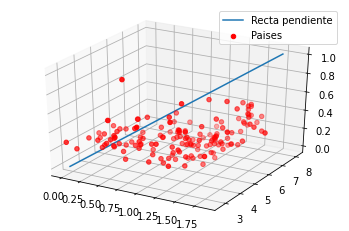

In [ ]:
fig = plt.figure()
ax = fig.gca(projection="3d")
plt.rcParams["legend.fontsize"] = 10

X = np.linspace(0,1.75)
Y = np.linspace(0,1)

#Ejes del plano

x2 = dataframe2.loc[dataframe2.index]["Economy GDP per Capita"]
y2 = dataframe2.loc[dataframe2.index]["Happiness Score"]
z2 = dataframe2.loc[dataframe2.index]["Generosity"]

#Informacion
ax.scatter(x2,y2,z2,color='r',label="Paises")
ax.plot3D(X,Y,2.19373445*X+1.44439253*Y+2.83726232,zdir='y',label="Recta pendiente")
ax.legend()


plt.show()

**Paso 4:** Determinar el error Estandar 


---
**EL ERROR ESTANDAR DE LA REGRESION MULTIPLE**

Es una medida de dispersión la estimación se hace más precisa conforme el grado de dispersión alrededor del plano de regresión se hace mas pequeño.

Para medir el error estandar de la regresion se utiliza la  siguiente formula:


<img src="https://res.cloudinary.com/dwnabmtxu/image/upload/v1615856673/asd_psmiji.png" align="center" >

Donde;


*   Y : Valores observados en la muestra
*   Y^ : Valores estimados a partir de la ecuación de regresión
*   n : Número de datos
*   m : Número de variables independientes


In [ ]:
sumatoriaE = (((dataframe2.loc[dataframe2.index]["Happiness Score"])-(2.19373445*(dataframe2.loc[dataframe2.index]["Economy GDP per Capita"])+1.44439253*((dataframe2.loc[dataframe2.index]["Generosity"]))+2.83726232))**2).sum()
desviavionEstandar = math.sqrt(sumatoriaE/(155-2-1))
print(desviavionEstandar)

0.6347028599343468


**CONCLUSION**

Se concluye que la medida de dispercion de los datos es de 0.6 con respecto a los datos del dataFrame

Al momento de graficar la recta junto con los datos del data frame en el plano R3 se puede obsevar que la dispercion de los datos es menor debido a la cantidad de variables intependientes.

# **BIBLIOGRAFIA**



1.   U.Sergio Arboleda.(2017)**Guias de Fısica Experimental: Fundamentos de Mecanica y Electromagnetismo**,Bogotá D.C., Colombia
2.   https://www.monografias.com/trabajos30/regresion-multiple/regresion-multiple.shtml
3.   https://users.exa.unicen.edu.ar/catedras/modysim/tutoriales/regresion_multiple.pdf
4.   https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/what-is-the-standard-error-of-the-coefficient/